In [16]:
 from owslib.wcs import WebCoverageService
wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/bdod.map', version='1.0.0')

In [17]:
 bbox = (-1784000, 1356000, -1140000, 1863000)

In [18]:
response = wcs.getCoverage(
    identifier='bdod_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::152160',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')

In [19]:
with open('Senegal_bdod_0-5_mean.tif', 'wb') as file:
    file.write(response.read())

In [20]:
import rasterio
ph = rasterio.open("Senegal_bdod_0-5_mean.tif", driver="GTiff")

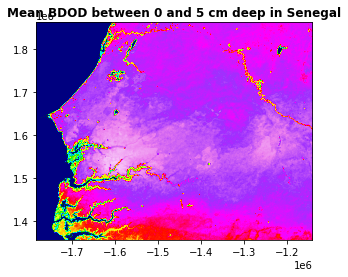

<AxesSubplot:title={'center':'Mean BDOD between 0 and 5 cm deep in Senegal'}>

In [21]:
from rasterio import plot
%matplotlib inline
plot.show(ph, title='Mean BDOD between 0 and 5 cm deep in Senegal', cmap='gist_ncar')

In [7]:
bdod_5_15_median.supportedFormats

['GEOTIFF_INT16']

In [8]:
 bdod_5_15_median.boundingboxes

[{'nativeSrs': 'EPSG:4326',
  'bbox': (-179.991347553068,
   -55.9773009202418,
   179.994461880094,
   82.7192840534453)},
 {'nativeSrs': 'EPSG:152160',
  'bbox': (-19949000.0, -6147500.0, 19861750.0, 8361000.0)}]

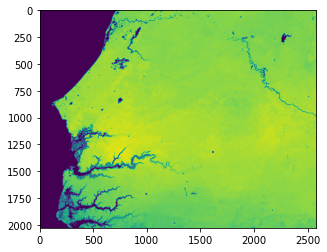

In [28]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open('Senegal_bdod_0-5_mean.tif', gdal.GA_ReadOnly) 
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [29]:
arr.shape

(2028, 2576)

In [30]:
band.GetStatistics( True, True )

[0.0, 168.0, 125.47743546195, 53.004465693983]

In [33]:
import numpy as np
np.median(arr)

148.0